In [1]:
from TP4_functions.load_conll2000 import load_conll2000_glove
import matplotlib.pyplot as plt                              
import torch                                                 
from torch import optim                                      
import torchvision                                           
import numpy as np                                           
import pickle                                                

### Exercice 1: softmax

In [2]:
def softmax(x):                                                                                          
    _x = np.exp(x - x.max())                                                                             
    return _x  / _x.sum()            

In [3]:
x_test_1 = torch.tensor([5., 1., 2., -1.])
softmax(x_test_1)

tensor([0.9341, 0.0171, 0.0465, 0.0023])

### Exercice 2: Classification de chiffre avec la régression logistique

In [4]:
def get_train_set_mnist():                                                                               
    dataset = torchvision.datasets.MNIST("./", download = True)                                          
    train_set_y, train_set_x = dataset.data[:50000], dataset.targets[:50000]                             
    test_set_y, test_set_x = dataset.data[50000:], dataset.targets[50000:]                               
                                                                                                         
    train_set_y = (train_set_y.view(50000, -1) + 0.0)                                                    
    mean_train, std_train = torch.mean(train_set_y), torch.std(train_set_y)                              
    train_set_y = (train_set_y - mean_train)/std_train                                                   
                                                                                                         
    train_set = []                                                                                       
    for i in range(50000):                                                                               
        train_set.append([train_set_x[i], train_set_y[i]])                                               
                                                                                                         
    test_set_y = (test_set_y.view(10000, -1) + 0.0)                                                      
    mean_test, std_test = torch.mean(test_set_y), torch.std(test_set_y)                                  
    test_set_y = (test_set_y - mean_test)/std_test                                                       
                                                                                                         
    test_set = []                                                                                        
    for i in range(10000):                                                                               
        test_set.append([test_set_x[i], test_set_y[i]])                                                  
                                                                                                         
    return train_set, test_set                                     

In [5]:
def logistic_reg(W, b, y):                                                                               
    return torch.softmax(W @ y + b, dim=0)           

In [6]:
def LossLogistic(train_set, W, b):                                                                       
    lce   = 0                                                                                            
    score = 0                                                                                            
    for x, y in train_set:                                                                               
        x_pred = logistic_reg(W, b, y)                                                                   
        lce += - torch.log(x_pred[x])                                                                    
        if torch.argmax(x_pred) == x:                                                                    
            score += 1                                                                                   
                                                                                                         
    lce   /= len(train_set)                                                                              
    score /= len(train_set)                                                                              
    return lce, score                                

In [7]:
def gradient_descent_logistic(W_lr, b_lr, alpha, iter, loss_fct, train_set):                             
    _L = torch.zeros(iter)                                                                               
    optimizer = optim.Adam([W_lr, b_lr], lr=alpha)                                                       
                                                                                                         
    for k in range(iter):                                                                          
                                                                                                         
        batch = [train_set[i] for i in np.random.randint(0,len(train_set),256)]                          
        optimizer.zero_grad()                                                                            
                                                                                                         
        loss, score = loss_fct(batch, W_lr, b_lr)                                                        
        loss.backward()                                                                                  
        optimizer.step()                                                                                 
                                                                                                         
        _L[k] = loss.item()                                                                              
                                                                                                         
        if (k+1) % 50 == 0:                                                                                  
            print("iteration: %d"%(k+1,))
            print("Loss     : %f"%_L[k])                                                                 
            print("Score    : %f"%score)                                                                 
                                                                                                         
    return W_lr, b_lr, _L                                                                

In [8]:
def test_logistic(test_set, W_lr, b_lr, alpha, iter, loss_fct):                                          
    score = 0                                                                                            
    W, b, _L = gradient_descent_logistic(W_lr, b_lr, alpha, iter, loss_fct, test_set)                    
                                                                                                         
    for x, y in test_set :                                                                               
        x_pred = logistic_reg(W, b, y)                                                                   
        if torch.argmax(x_pred) == x:                                                                    
            score += 1                                                                                   
                                                                                                         
    return score / len(test_set)                                             

In [9]:
def main_logistic():    
    train_set, test_set = get_train_set_mnist()                                                          
    W_lr = torch.load("TP4_functions/W_lr.pt").requires_grad_(True)                                      
    b_lr = torch.load("TP4_functions/b_lr.pt").requires_grad_(True)                         
    W, b, _L = gradient_descent_logistic(W_lr, b_lr, 5E-5, 1000,LossLogistic,train_set)
    plt.plot(_L)
    

iteration: 50
Loss     : 2.082643
Score    : 0.289062
iteration: 100
Loss     : 1.795379
Score    : 0.468750
iteration: 150
Loss     : 1.583333
Score    : 0.582031
iteration: 200
Loss     : 1.364498
Score    : 0.667969
iteration: 250
Loss     : 1.313649
Score    : 0.652344
iteration: 300
Loss     : 1.168977
Score    : 0.714844
iteration: 350
Loss     : 1.070446
Score    : 0.792969
iteration: 400
Loss     : 0.999731
Score    : 0.792969
iteration: 450
Loss     : 0.909630
Score    : 0.792969
iteration: 500
Loss     : 0.906358
Score    : 0.816406
iteration: 550
Loss     : 0.794508
Score    : 0.820312
iteration: 600
Loss     : 0.725309
Score    : 0.847656
iteration: 650
Loss     : 0.770817
Score    : 0.832031
iteration: 700
Loss     : 0.791719
Score    : 0.773438
iteration: 750
Loss     : 0.694611
Score    : 0.828125
iteration: 800
Loss     : 0.706561
Score    : 0.820312
iteration: 850
Loss     : 0.704777
Score    : 0.835938
iteration: 900
Loss     : 0.625926
Score    : 0.875000
iteration: 

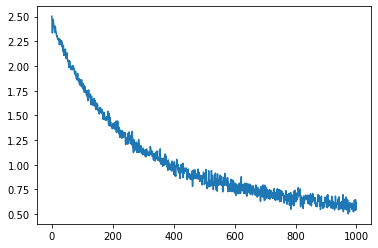

In [10]:
main_logistic()

### Les résultas finaux:
    * Loss  = 0.550799
    * Score = 0.878906

### Exercice 4: Maximum Entropy Markov Model pour le POS tagging

In [11]:
#Global var
Omega_X = 0

In [12]:
def label2vec(labels):                                                                                   
    vect = [ Omega_X.index(l) for l in labels ]                                                          
    return vect                   

In [13]:
def pred_memm(alpha):                                                                                    
        return [torch.argmax(alpha[i]).item() for i in range(len(alpha))]         

In [14]:
def forward_memm(y ,W1, b1, W2, b2):                                                                     
                                                                                                         
    nb_words   = y.shape[0]                                                                              
    nb_labels = len(Omega_X)                                                                             
                                                                                                         
    alpha    = torch.zeros(nb_words, nb_labels)                                                          
    alpha[0] = logistic_reg(W1, b1, y[0])                                                                
                                                                                                         
    for i in range(nb_words -1):                                                                         
        alpha[i+1] = torch.zeros(nb_labels)                                                              
        for j in range(nb_labels):                                                                       
            label_encoded = torch.zeros(nb_labels)                                                       
            label_encoded[j] = 1                                                                         
            y_t_1_and_x_t = torch.cat((label_encoded, y[i+1]),0)                                         
            alpha[i+1] = alpha[i+1].add( alpha[i,j].item() * logistic_reg(W2, b2, y_t_1_and_x_t))        
                                                                                                         
    return alpha                             

In [15]:
def _LossMemm(x, alpha):                                                                                 
    lce   = 0                                                                                            
    score = 0                                                                                            
    x_vect = label2vec(x)                                                                                
    for i in range(len(x_vect)):                                                                         
        lce   += - torch.log(alpha[i][x_vect[i]])                                                        
        score += pred_memm(alpha)[i] == x_vect[i]                                                        
                                                                                                         
    return (lce / len(x_vect), score / len(x_vect) )                                                     
                                                                                                         
                                                                                                         
def LossMemm(train_set, W1, b1, W2, b2):                                                                 
    lce   = 0                                                                                            
    score = 0                                                                                            
    for x, y in train_set:                                                                               
        alpha = forward_memm(y, W1, b1, W2, b2)                                                          
        _lce, _score  = _LossMemm(x, alpha)                                                              
        lce   += _lce                                                                                    
        score += _score                                                                                  
                                                                                                         
    return (lce / len(train_set), score / len(train_set))                

In [16]:
def gradient_descent_memm(W1, b1, W2, b2, alpha, iter, loss_fct, train_set):                             
                                                                                                         
    _L        = torch.zeros(iter)                                                                        
    optimizer = optim.Adam([W1, b1, W2, b2], lr = alpha)                                                 
                                                                                                         
    for k in range(iter):                                                                          
        batch = [train_set[i] for i in np.random.randint(0,len(train_set),32)]                           
        optimizer.zero_grad()                                                                            
                                                                                                         
        loss, score = loss_fct(batch, W1, b1, W2, b2)                                                    
        loss.backward()                                                                                  
        optimizer.step()                                                                                 
        _L[k] = loss.item()                                                                              
                                                                                                         
        if (k+1) % 50 == 0:                                                                                   
            print("iteration: %d"%(k+1,))                 
            print("Loss     : %f"%_L[k])            
            print("Score    : %f"%score)            
                                                                                                         
    return W1, b1, W2, b2, _L                                                 

In [17]:
def main_memm():                                                                                
    path = "./TP4_functions/"  
    global Omega_X
    Omega_X, train_set, test_set = load_conll2000_glove(path)    
    
    W_lr1 = torch.load(path+"W_lr1.pt").requires_grad_(True)                                             
    b_lr1 = torch.load(path+"b_lr1.pt").requires_grad_(True)                                             
    W_lr2 = torch.load(path+"W_lr2.pt").requires_grad_(True)                                             
    b_lr2 = torch.load(path+"b_lr2.pt").requires_grad_(True)  
    loss_10, _ = LossMemm(train_set[:10], W_lr1, b_lr1, W_lr2, b_lr2)
    print("loss avec les paramètres initiaux pour les dix premiers éléments du train set: %f"%loss_10)
    W1, b1, W2, b2,  _L = \
           gradient_descent_memm(W_lr1, b_lr1, W_lr2, b_lr2,  5E-4, 1000, LossMemm, train_set)
    plt.plot(_L)

loss avec les paramètres initiaux pour les dix premiers éléments du train set: 2.706440
iteration: 50
Loss     : 2.280005
Score    : 0.322838
iteration: 100
Loss     : 2.031650
Score    : 0.490901
iteration: 150
Loss     : 1.829864
Score    : 0.572991
iteration: 200
Loss     : 1.687805
Score    : 0.589730
iteration: 250
Loss     : 1.536192
Score    : 0.601898
iteration: 300
Loss     : 1.427399
Score    : 0.638113
iteration: 350
Loss     : 1.308021
Score    : 0.659458
iteration: 400
Loss     : 1.271494
Score    : 0.672308
iteration: 450
Loss     : 1.174602
Score    : 0.701361
iteration: 500
Loss     : 1.131786
Score    : 0.733517
iteration: 550
Loss     : 1.075234
Score    : 0.748881
iteration: 600
Loss     : 1.040770
Score    : 0.729006
iteration: 650
Loss     : 0.977332
Score    : 0.760228
iteration: 700
Loss     : 1.071381
Score    : 0.679010
iteration: 750
Loss     : 0.916107
Score    : 0.770985
iteration: 800
Loss     : 0.928644
Score    : 0.794493
iteration: 850
Loss     : 0.91113

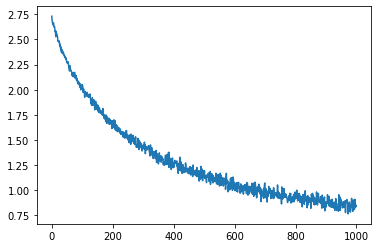

In [18]:
main_memm()

### Les résultas finaux après 1000 itérations:
    * Loss  = 0.848603
    * Score = 0.782409
    